# 梯度下降法：优化问题的核心引擎

梯度下降法（Gradient Descent）是机器学习和数值优化领域中求解函数极值的基础性方法，其本质是通过迭代逼近策略寻找目标函数的极小值点。

在监督学习框架下，模型的训练目标常被定义为最小化损失函数 J(θ)，其中θ为待优化参数。

梯度下降的核心思想源于多元微积分中的方向导数理论：函数的梯度 ∇J(θ) 指向当前点处函数值增长最快的方向，而负梯度方向则是函数值下降最快的路径。

**关键理论特性**

1. 方向最优性
   负梯度方向是当前点处函数值下降最快的方向（一阶泰勒展开视角下），这为参数的局部更新提供了明确的指导。
2. 收敛条件
   在凸函数假设下，适当选择学习率可保证算法收敛至全局最小值；对于非凸函数（如神经网络损失函数），梯度下降通常收敛至局部极小值或鞍点。
3. 学习率的作用
   学习率需权衡收敛速度与稳定性。过大会导致震荡甚至发散，过小则收敛缓慢。

# 使用梯度下降法解决线性拟合问题

下面是在之前线性拟合文档使用过的生成测试数据代码，接下来会用梯度下降法求解线性拟合问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 自变量
x = np.linspace(0, 10, 100)
# 真实斜率
a_true = 2.5
# 真实截距
b_true = 1.0
# 因变量，加入噪声
y = a_true * x + b_true + np.random.randn(100)

In [2]:
def linear_fit_BGD(x: np.ndarray, y: np.ndarray, learning_rate: float = 0.01, eval_iters: int = 100):
    # 初始化参数
    a = 0.0
    b = 0.0
    n = len(x)
    lossi = []

    # 执行梯度下降
    for _ in range(eval_iters):
        # 预测值
        y_pred = a * x + b
        # 计算损失 (MSE)
        loss = np.sum((y_pred - y) ** 2) / n
        lossi.append(loss)
        # 计算梯度
        da = (2 / n) * np.sum((y_pred - y) * x)
        db = (2 / n) * np.sum(y_pred - y)
        # 更新参数
        a -= learning_rate * da
        b -= learning_rate * db
    return a, b, lossi

a_hat, b_hat, lossi = linear_fit_BGD(x, y, 0.01, 5)

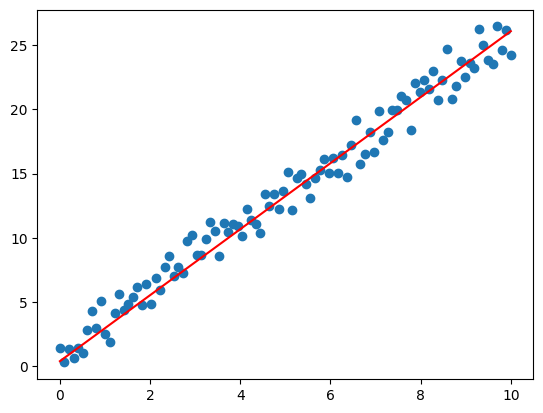

In [3]:
plt.figure()
plt.scatter(x, y, label="Data Points")
plt.plot(x, a_hat * x + b_hat, color="red", label=f"y = {a_hat}*x+{b_hat}")
plt.show()

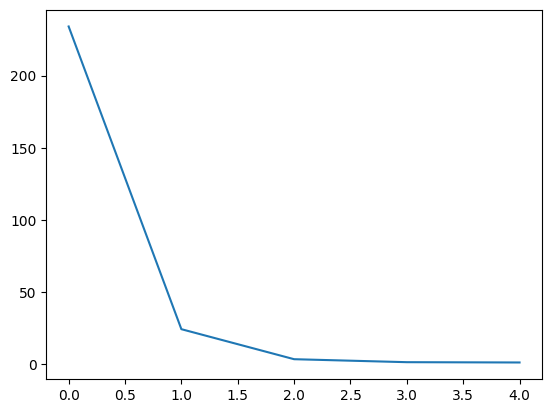

In [4]:
plt.figure()
plt.plot(lossi)
plt.show()

可以看到进行只进行了 5 次回归就达成了很优秀的效果

# 随机梯度下降法

在之前的实现中，算法每次计算梯度时都会对全部真实值和预测值进行计算

这样做有很多不足之处，首先是计算量很大。其次是梯度一直平滑的下降，到达梯度为 0 时就没办法继续优化了

我们可以考虑把数据随机批然后拟合，这样算力消耗会变少，而且引入了一些随机性，使得回归有可能跳出 0 梯度点使参数达到更优秀的效果

In [5]:
import random


def linear_fit_SGD(x: np.ndarray, y: np.ndarray, learning_rate: float = 0.01, eval_iters: int = 100, batch_size: int = 100):
    # 初始化参数
    a = 0.0
    b = 0.0
    n = len(x)
    lossi = []
    # 执行梯度下降
    for _ in range(eval_iters):
        ix = random.sample(range(100), batch_size)
        x_batch = x[ix]
        y_batch = y[ix]
        y_pred = a * x_batch + b
        # 计算损失 (MSE)
        loss = np.sum((y_pred - y_batch) ** 2) / n
        lossi.append(loss)
        # 计算梯度
        da = (2 / n) * np.sum((y_pred - y_batch) * x_batch)
        db = (2 / n) * np.sum(y_pred - y_batch)
        # 更新参数
        a -= learning_rate * da
        b -= learning_rate * db
    return a, b, lossi


a_hat, b_hat, lossi = linear_fit_SGD(x, y, 0.03, 5, 30)

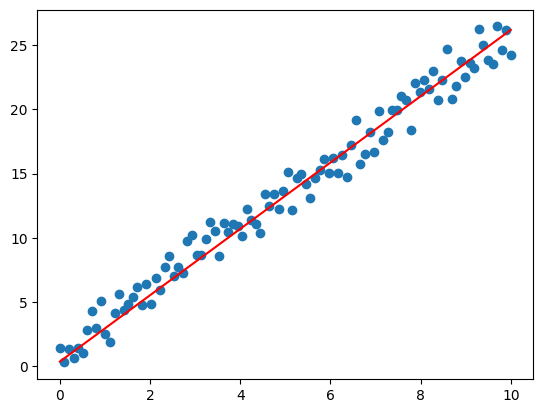

In [6]:
plt.figure()
plt.scatter(x, y, label="Data Points")
plt.plot(x, a_hat * x + b_hat, color="red", label=f"y = {a_hat}*x+{b_hat}")
plt.show()

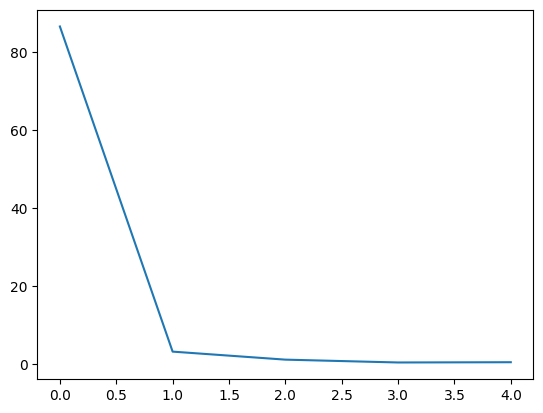

In [7]:
plt.figure()
plt.plot(lossi)
plt.show()

在上图，SGD 算法每轮只取 30 条数据回归同样轮数就能达到 BGD 的效果

# 算法对比与选择建议

|算法|核心优势|主要缺陷|典型应用场景|
|----|----|----|----|
|BGD|更新稳定，理论分析简单|计算成本高，内存需求大|小规模数据或理论研究
|SGD|计算高效，适合大规模数据|震荡明显，需精细调参|在线学习、简单模型训练
|Mini-batch GD|平衡效率与稳定性，硬件加速友好|批量大小需手动选择|深度学习默认优化方式
|Momentum|加速收敛，减少震荡|需调整动量系数|损失函数地形复杂（如“峡谷”）
|Adagrad|自适应稀疏特征学习率|学习率过早衰减|NLP、推荐系统
|RMSprop|动态调整学习率，适合非平稳目标|超参数敏感|RNN、非凸优化
|Adam|综合性能强，超参数鲁棒性高|可能在某些任务中泛化性略差|深度学习通用优化

~建议无脑Adam~